# 程序说明
时间：2016年11月23日

说明：一个自编码器的例程。
1. 单隐藏层的自编码器
2. 稀疏约束的自编码器
3. 多隐藏层的自编码器

数据集：MNIST

原博客地址：[Building Autoencoders in Keras](https://blog.keras.io/building-autoencoders-in-keras.html)


![autoencoders](https://blog.keras.io/img/ae/autoencoder_schema.jpg)

# 1.加载keras模块

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# 2.构建单隐藏层的自编码器

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input=input_img, output=decoded)

## 定义编码器

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input=input_img, output=encoded)

## 定义解码器

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 准备数据

In [6]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


## 训练模型

In [7]:
autoencoder.fit(x_train, x_train,
                nb_epoch=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s - loss: 0.3755 - val_loss: 0.2733
Epoch 2/50
60000/60000 [==============================] - 1s - loss: 0.2659 - val_loss: 0.2553
Epoch 3/50
60000/60000 [==============================] - 1s - loss: 0.2458 - val_loss: 0.2344
Epoch 4/50
60000/60000 [==============================] - 1s - loss: 0.2269 - val_loss: 0.2174
Epoch 5/50
60000/60000 [==============================] - 1s - loss: 0.2121 - val_loss: 0.2043
Epoch 6/50
60000/60000 [==============================] - 1s - loss: 0.2004 - val_loss: 0.1938
Epoch 7/50
60000/60000 [==============================] - 1s - loss: 0.1910 - val_loss: 0.1854
Epoch 8/50
60000/60000 [==============================] - 1s - loss: 0.1833 - val_loss: 0.1784
Epoch 9/50
60000/60000 [==============================] - 1s - loss: 0.1768 - val_loss: 0.1726
Epoch 10/50
60000/60000 [==============================] - 1s - loss: 0.1713 - val_loss: 0.1674

## 在测试集上进行编码和解码

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

## 显示结果

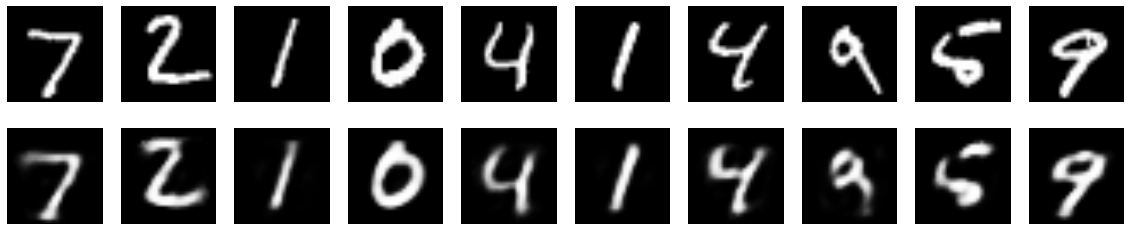

In [9]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3.构建编码表示上添加稀疏约束的自编码器

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.activity_l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input=input_img, output=decoded)

## 定义模型

In [11]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

## 训练模型

In [12]:
autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s - loss: 0.3401 - val_loss: 0.2627
Epoch 2/100
60000/60000 [==============================] - 2s - loss: 0.2541 - val_loss: 0.2413
Epoch 3/100
60000/60000 [==============================] - 2s - loss: 0.2296 - val_loss: 0.2164
Epoch 4/100
60000/60000 [==============================] - 2s - loss: 0.2068 - val_loss: 0.1989
Epoch 5/100
60000/60000 [==============================] - 2s - loss: 0.1940 - val_loss: 0.1868
Epoch 6/100
60000/60000 [==============================] - 2s - loss: 0.1842 - val_loss: 0.1792
Epoch 7/100
60000/60000 [==============================] - 2s - loss: 0.1765 - val_loss: 0.1711
Epoch 8/100
60000/60000 [==============================] - 2s - loss: 0.1704 - val_loss: 0.1667
Epoch 9/100
60000/60000 [==============================] - 2s - loss: 0.1658 - val_loss: 0.1616
Epoch 10/100
60000/60000 [==============================] - 2s - loss: 0.1616 - val_lo

## 在测试集上进行编码和解码
该模型与之前的模型明显不同在于编码的稀疏结构，该模型在10000个测试数据上encoded_imgs.mean()得到了3.33的值，而之前的模型得到了7.30值，说明该模型产生的编码更加的稀疏。

In [13]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

## 显示结果

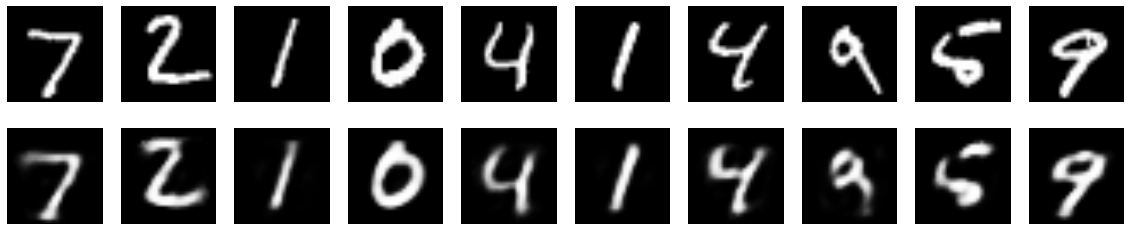

In [14]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 4.构建多隐藏层自编码器

In [15]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = Model(input=input_img, output=decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))